In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# df2 = pd.read_csv('TCGA_InfoWithGrade.csv')
df = pd.read_csv('TCGA_GBM_LGG_Mutations_all.csv')

print(df.shape)

(862, 27)


In [3]:
# print(df2.columns)
print(df.columns)
print(df.head())

Index(['Grade', 'Project', 'Case_ID', 'Gender', 'Age_at_diagnosis',
       'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')
  Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0   LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1   LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2   LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3   LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4   LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   

         Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
0   Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
1             Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2         Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   
3  As

In [4]:
# convert column to string
# df['Age_at_diagnosis'] = df['Age_at_diagnosis'].astype(str)
# split string values into years and days columns
df[['years', 'days']] = df['Age_at_diagnosis'].str.extract('(\d+) years (\d+) days').fillna(0)
df['years'] = pd.to_numeric(df['years'])
df['days'] = pd.to_numeric(df['days'])
# calculate age in decimal form
df['Age_decimal'] = df['years'] + df['days'] / 365

# round age to two decimal places
df['Age_decimal'] = df['Age_decimal'].round(2)

# drop unnecessary columns
df.drop(['years', 'days', 'Age_at_diagnosis'], axis=1, inplace=True)

In [5]:
df.columns

Index(['Grade', 'Project', 'Case_ID', 'Gender', 'Primary_Diagnosis', 'Race',
       'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA', 'Age_decimal'],
      dtype='object')

In [6]:
print(df.head())

  Grade   Project       Case_ID  Gender        Primary_Diagnosis   Race  \
0   LGG  TCGA-LGG  TCGA-DU-8164    Male   Oligodendroglioma, NOS  white   
1   LGG  TCGA-LGG  TCGA-QH-A6CY    Male             Mixed glioma  white   
2   LGG  TCGA-LGG  TCGA-HW-A5KM    Male         Astrocytoma, NOS  white   
3   LGG  TCGA-LGG  TCGA-E1-A7YE  Female  Astrocytoma, anaplastic  white   
4   LGG  TCGA-LGG  TCGA-S9-A6WG    Male  Astrocytoma, anaplastic  white   

      IDH1         TP53         ATRX         PTEN  ...          RB1  \
0  MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
1  MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
2  MUTATED      MUTATED      MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
3  MUTATED      MUTATED      MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
4  MUTATED      MUTATED      MUTATED  NOT_MUTATED  ...  NOT_MUTATED   

        NOTCH1         BCOR        CSMD3      SMARCA4       GRIN2A  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATE

In [7]:
# print(df['Age_decimal'].unique())

In [8]:
df = df.drop(columns=['Project','Case_ID', 'Primary_Diagnosis'])
df = df[df != '--'].dropna()
df = df[df != 'not reported'].dropna()
df.shape

(840, 24)

In [9]:
df.head()

,Grade,Gender,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Age_decimal
0,LGG,Male,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,51.30
1,LGG,Male,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,38.72
2,LGG,Male,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,35.17
3,LGG,Female,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,32.78
4,LGG,Male,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,31.51


In [10]:
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df.replace({'white' : 0, 'black or african american':1, 'asian':2, 'american indian or alaska native':3}, inplace=True)
# df['Race'].replace(['white', 'black or african American', 'asian', 'american indian or alaska native'],[0,1,2,3],inplace=True)

df.replace({'NOT_MUTATED':0, 'MUTATED':1}, inplace=True)
df.replace({'LGG':0, 'GBM':1}, inplace=True)
df.head()

,Grade,Gender,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Age_decimal
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51.30
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,38.72
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.17
3,0,1,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,32.78
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31.51


In [11]:
# df.to_csv('df.csv')

In [12]:
df.dtypes

Grade            int64
Gender           int64
Race             int64
IDH1             int64
TP53             int64
ATRX             int64
PTEN             int64
EGFR             int64
CIC              int64
MUC16            int64
PIK3CA           int64
NF1              int64
PIK3R1           int64
FUBP1            int64
RB1              int64
NOTCH1           int64
BCOR             int64
CSMD3            int64
SMARCA4          int64
GRIN2A           int64
IDH2             int64
FAT4             int64
PDGFRA           int64
Age_decimal    float64
dtype: object

In [13]:
df.nunique()

Grade            2
Gender           2
Race             4
IDH1             2
TP53             2
ATRX             2
PTEN             2
EGFR             2
CIC              2
MUC16            2
PIK3CA           2
NF1              2
PIK3R1           2
FUBP1            2
RB1              2
NOTCH1           2
BCOR             2
CSMD3            2
SMARCA4          2
GRIN2A           2
IDH2             2
FAT4             2
PDGFRA           2
Age_decimal    765
dtype: int64

In [14]:
df.describe

<bound method NDFrame.describe of      Grade  Gender  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  ...  RB1  \
0        0       0     0     1     0     0     0     0    0      0  ...    0   
1        0       0     0     1     0     0     0     0    1      0  ...    0   
2        0       0     0     1     1     1     0     0    0      0  ...    0   
3        0       1     0     1     1     1     0     0    0      1  ...    0   
4        0       0     0     1     1     1     0     0    0      0  ...    0   
..     ...     ...   ...   ...   ...   ...   ...   ...  ...    ...  ...  ...   
857      1       1     0     0     0     0     1     0    0      0  ...    0   
858      1       0     0     0     1     0     1     0    0      0  ...    0   
859      1       1     0     0     1     0     1     0    0      0  ...    0   
860      1       0     0     0     1     0     0     0    0      1  ...    1   
861      1       0     1     0     0     0     0     0    0      0  ...    0   

     

In [15]:
df.isna().sum()

Grade          0
Gender         0
Race           0
IDH1           0
TP53           0
ATRX           0
PTEN           0
EGFR           0
CIC            0
MUC16          0
PIK3CA         0
NF1            0
PIK3R1         0
FUBP1          0
RB1            0
NOTCH1         0
BCOR           0
CSMD3          0
SMARCA4        0
GRIN2A         0
IDH2           0
FAT4           0
PDGFRA         0
Age_decimal    0
dtype: int64

In [16]:
df.shape

(840, 24)

In [17]:
df.describe()

,Grade,Gender,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Age_decimal
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.419048,0.417857,0.107143,0.482143,0.414286,0.258333,0.167857,0.133333,0.132143,0.116667,...,0.047619,0.045238,0.034524,0.032143,0.032143,0.032143,0.027381,0.027381,0.026190,50.691440
std,0.493697,0.493500,0.369191,0.499979,0.492892,0.437979,0.373962,0.340137,0.338848,0.321214,...,0.213086,0.207950,0.182679,0.176484,0.176484,0.176484,0.163288,0.163288,0.159797,15.925732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.960000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.390000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.617500
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.290000


In [18]:
corr = df.corr()
corr.shape

(24, 24)

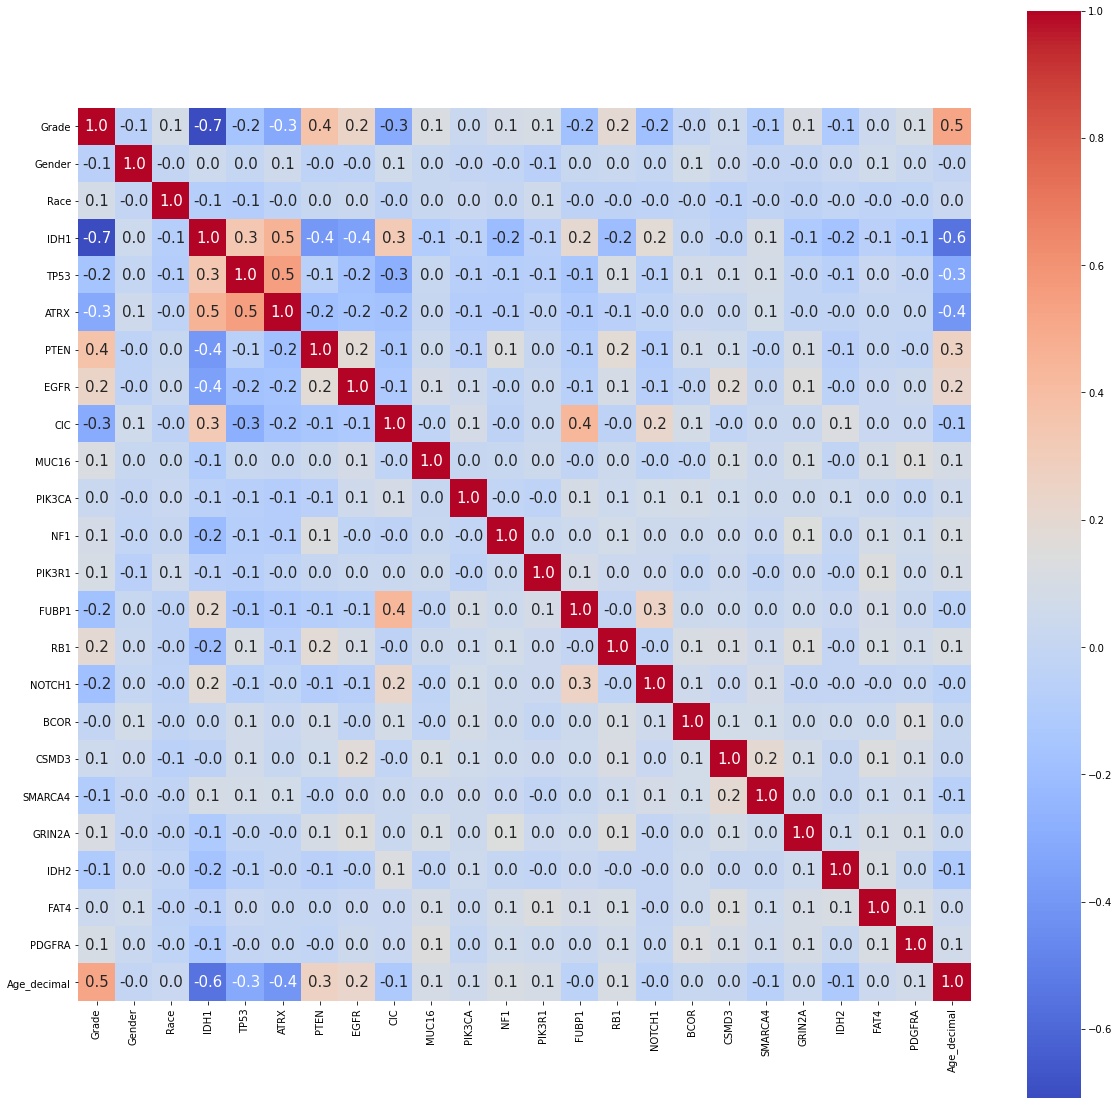

In [19]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
plt.show()

In [20]:
X = df.iloc[:,1:].values

In [21]:
Y = df.iloc[:, 0].values

In [22]:
print(X)

[[ 0.    0.    1.   ...  0.    0.   51.3 ]
 [ 0.    0.    1.   ...  0.    0.   38.72]
 [ 0.    0.    1.   ...  0.    0.   35.17]
 ...
 [ 1.    0.    0.   ...  0.    0.   77.49]
 [ 0.    0.    0.   ...  0.    0.   63.33]
 [ 0.    1.    0.   ...  0.    0.   76.61]]


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=3)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(672, 23) (168, 23) (672,) (168,)


In [24]:
print(xtrain)

[[ 1.    0.    1.   ...  0.    0.   42.47]
 [ 1.    0.    1.   ...  0.    0.   47.82]
 [ 1.    0.    1.   ...  0.    0.   56.42]
 ...
 [ 0.    0.    0.   ...  1.    0.   77.42]
 [ 1.    0.    1.   ...  0.    0.   44.56]
 [ 1.    0.    0.   ...  0.    0.   53.4 ]]


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain[:, 22:] = sc.fit_transform(xtrain[:, 22:])
xtest[:, 22:] = sc.transform(xtest[:, 22:])

In [26]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

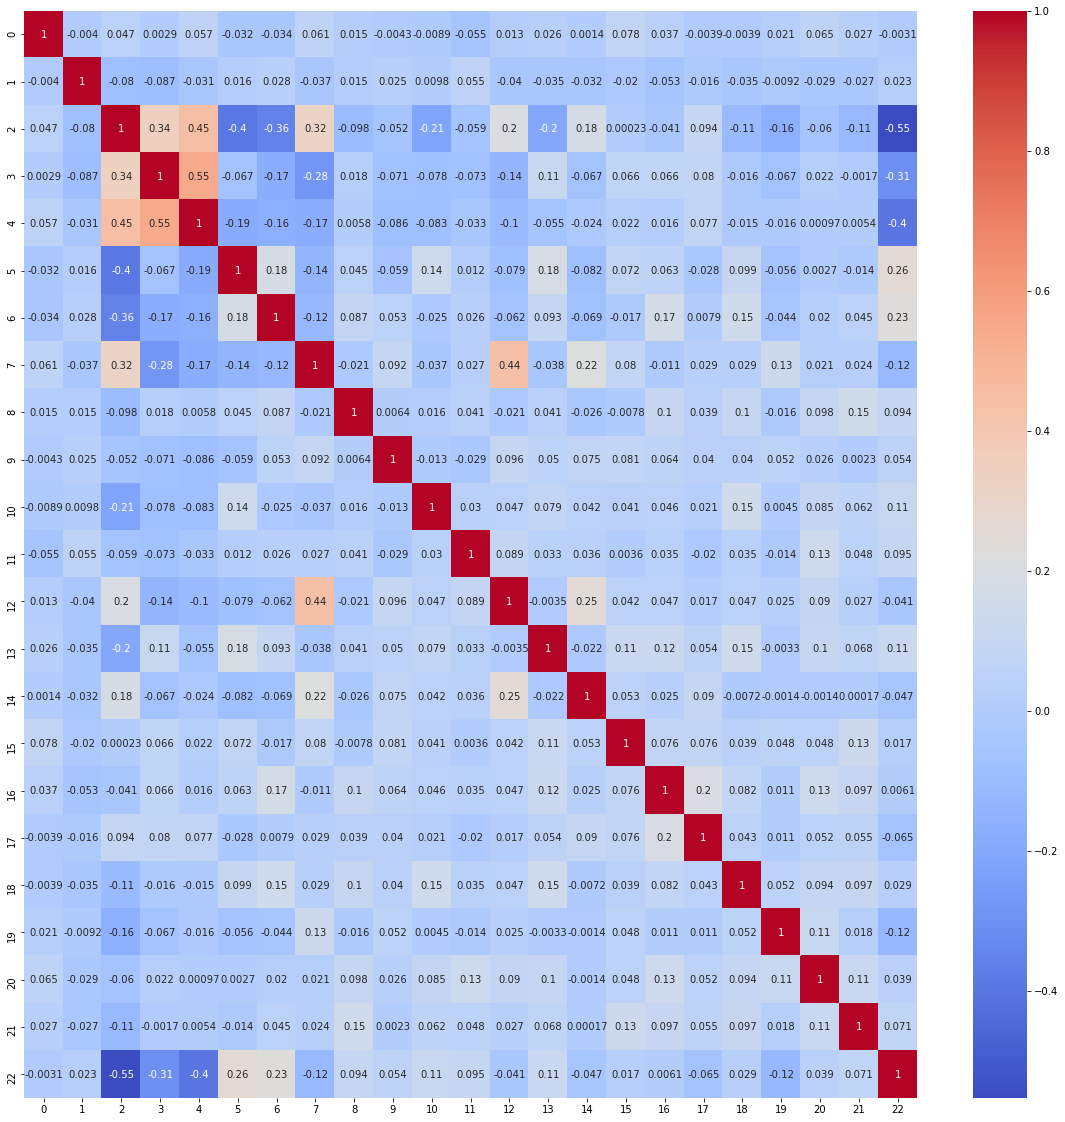

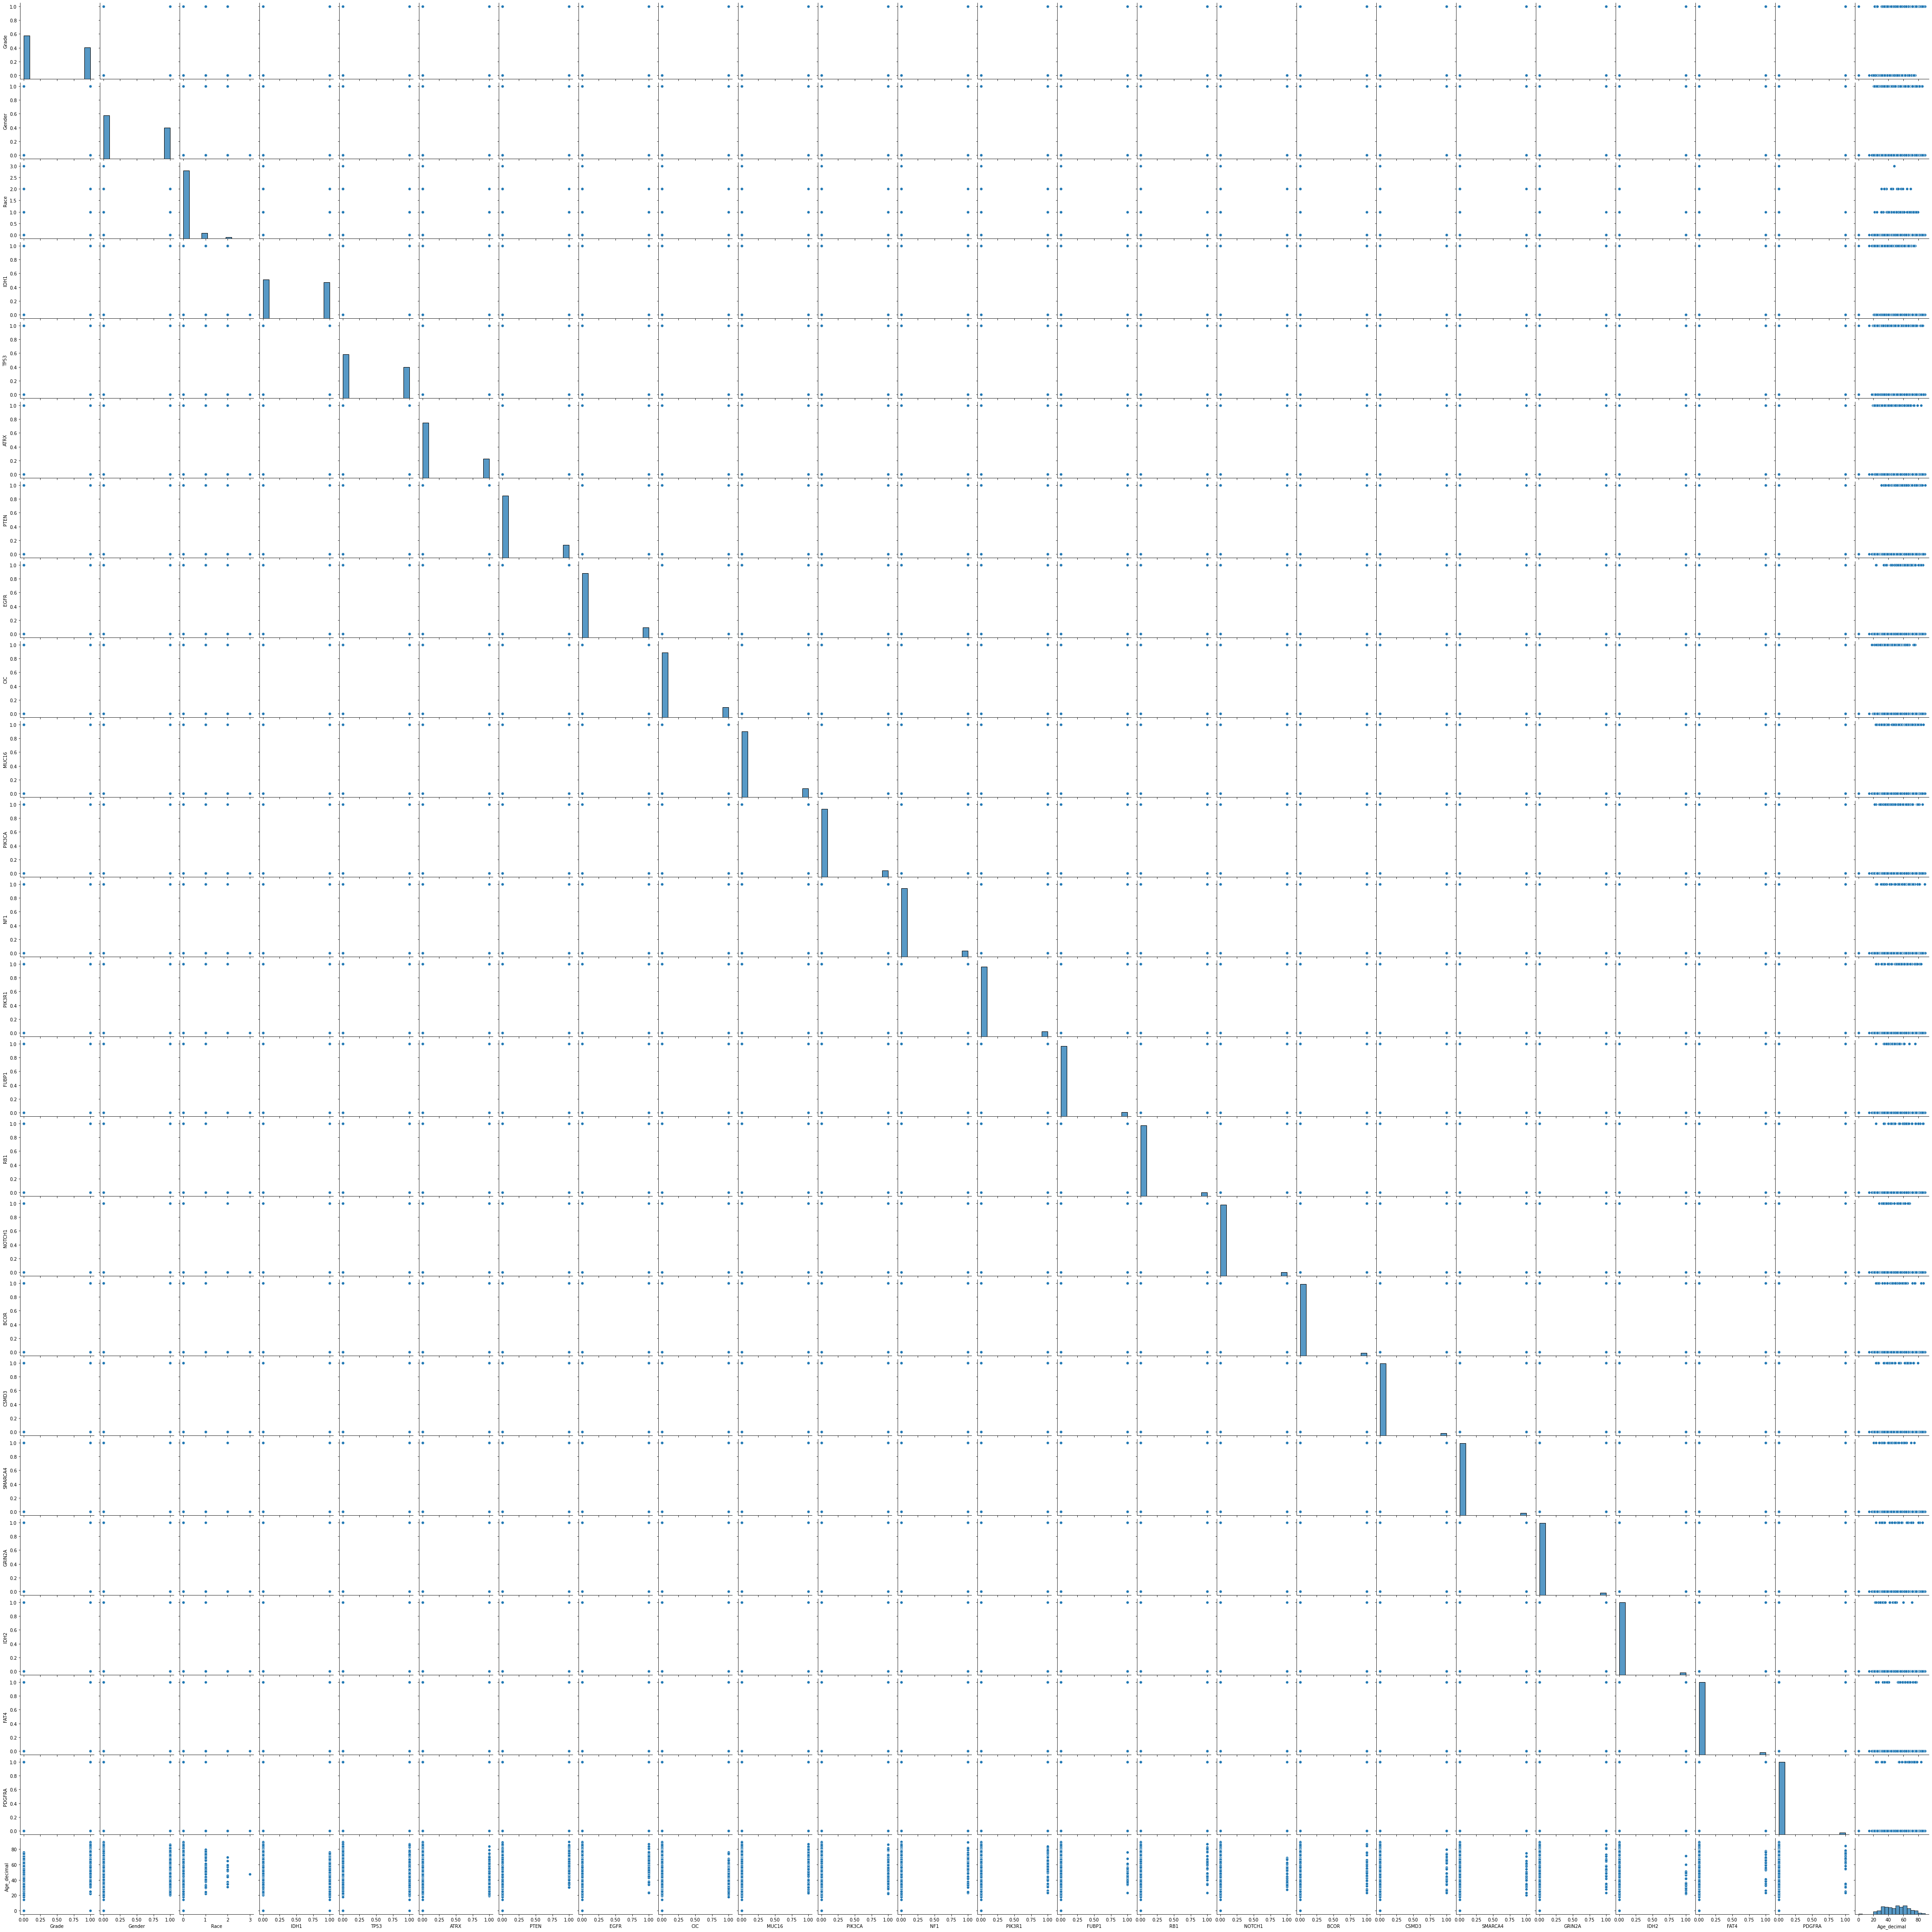

In [27]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
sns.pairplot(df)
plt.show()


In [28]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 3)
print("Size of training set:", xtrain.shape)
print("Size of test set:", xtest.shape)

Size of training set: (588, 23)
Size of test set: (252, 23)


In [29]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [42]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(random_state=1)

logreg.fit(xtrain, ytrain)

# Pred on train data
# pred_train = logreg.predict(xtrain)
# Pred on test data
pred_test = logreg.predict(xtest)

# print("training accuracy is ", accuracy_score(pred_train, ytrain))
# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(ytest, pred_test) * 100, 2)
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  84.52


Gaussian Naive Bayes

In [43]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()

model.fit(xtrain, ytrain)

# Pred on train data
# pred_train = logreg.predict(xtrain)
# Pred on test data
pred_test = logreg.predict(xtest)

# print("training accuracy is ", accuracy_score(pred_train, ytrain))

# Calculating the accuracy
acc_nb = round( metrics.accuracy_score(ytest, pred_test) * 100, 2)
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  84.52


Decision Tree Classifier

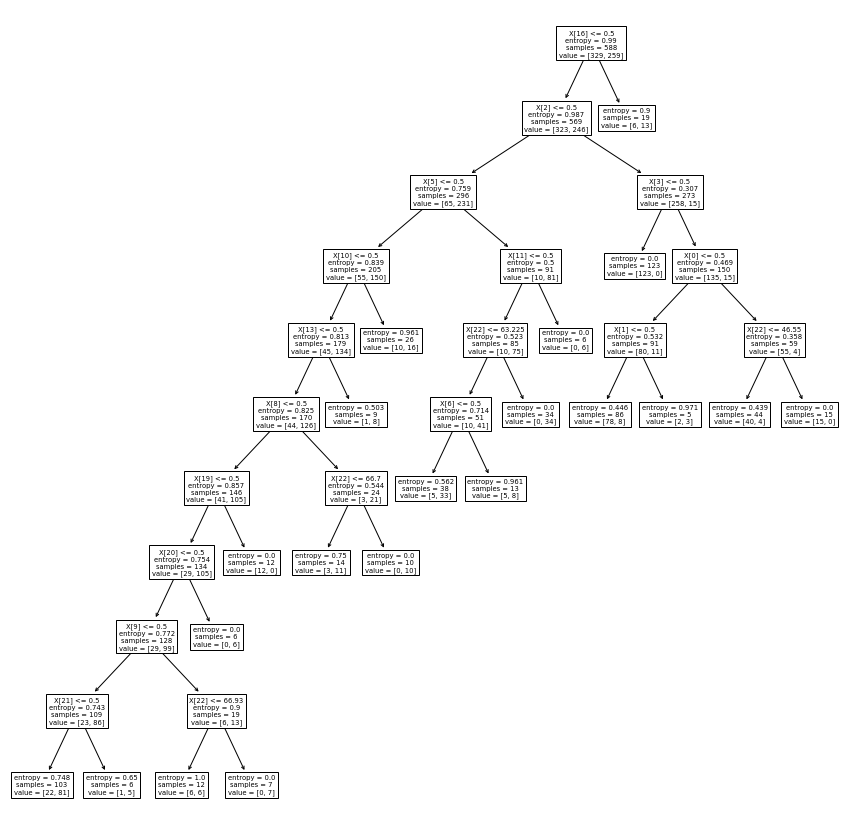

In [32]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# model = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(xtrain, ytrain)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_
clf.fit(xtrain, ytrain)

plt.figure(figsize=(15,15))
plot_tree(clf)
plt.show()

# Pred on train data
# pred_train = clf.predict(xtrain)
# Pred on test data
pred_test = clf.predict(xtest)

# print("training accuracy is ", accuracy_score(pred_train, ytrain))


In [44]:
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(ytest, pred_test) * 100, 2)
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  84.52


KNN (K-NEAREST NEIGHBOUR)

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
param_grid = {'n_neighbors': k_values, 'metric': distance_metrics}

# Perform grid search cross-validation
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Train and evaluate the final model on the test set
knn_final = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                  metric=grid_search.best_params_['metric'])
knn_final.fit(xtrain, ytrain)
y_pred = knn_final.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Final accuracy on test set: {:.2f}%".format(accuracy * 100))


Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 11}
Best accuracy: 88.09%
Final accuracy on test set: 85.32%


In [34]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(xtrain, ytrain)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=10)

In [45]:
# Prediction on test data
pred_test = rf.predict(xtest)
# pred_train = rf.predict(xtrain)

# Calculating the accuracy
accuracy_rf = round(accuracy_score(ytest, pred_test)*100, 2)
print('Accuracy of Random Forest Model : ', accuracy_rf)

Accuracy of Random Forest Model :  79.37


Support Vector Machine

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='linear', random_state=1)
model.fit(xtrain, ytrain)
percep_train = model.predict(xtrain)
percep_test = model.predict(xtest)
print('training accuracy: ', accuracy_score(percep_train, ytrain))
print('testing accuracy: ', accuracy_score(percep_test, ytest))


training accuracy:  0.8826530612244898
testing accuracy:  0.8174603174603174


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='rbf', random_state=1)
model.fit(xtrain, ytrain)
percep_train = model.predict(xtrain)
percep_test = model.predict(xtest)
print('training accuracy: ', accuracy_score(percep_train, ytrain))
print('testing accuracy: ', accuracy_score(percep_test, ytest))


training accuracy:  0.9047619047619048
testing accuracy:  0.8333333333333334


In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='poly', random_state=1)
model.fit(xtrain, ytrain)
percep_train = model.predict(xtrain)
percep_test = model.predict(xtest)
print('training accuracy: ', accuracy_score(percep_train, ytrain))
print('testing accuracy: ', accuracy_score(percep_test, ytest))


training accuracy:  0.8945578231292517
testing accuracy:  0.8373015873015873
